In [5]:
!pip install lifelines

In [6]:
!pip install hmmlearn

In [3]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
cell1 = pd.read_csv('Churn_Data_cleaned.csv')

# Drop columns with more than 50% missing data
cell1 = cell1.loc[:, cell1.isnull().mean() < 0.5]

# Fill missing numeric values with median
numeric_cols = cell1.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    cell1[col].fillna(cell1[col].median(), inplace=True)

# One-hot encode categorical variables
categorical_cols = cell1.select_dtypes(include=['object']).columns
cell1_encoded = pd.get_dummies(cell1, columns=categorical_cols, drop_first=True)

# Identify and remove low variance columns
selector = VarianceThreshold(threshold=0.01)
selector.fit(cell1_encoded)
cell1_filtered = cell1_encoded[cell1_encoded.columns[selector.get_support(indices=True)]]

# Drop highly correlated columns
corr_matrix = cell1_filtered.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cell1_filtered = cell1_filtered.drop(to_drop, axis=1)

# Fit Cox Proportional Hazards Model with L2 regularization to handle multicollinearity
cph = CoxPHFitter(penalizer=0.1)
cph.fit(cell1_filtered, duration_col='months', event_col='churn')



<ipython-input-3-33b85e5a2345>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cell1[col].fillna(cell1[col].median(), inplace=True)


<lifelines.CoxPHFitter: fitted with 93893 total observations, 47177 right-censored observations>

In [7]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
cell1 = pd.read_csv('Churn_Data_cleaned.csv')

# Drop columns with more than 50% missing data
cell1 = cell1.loc[:, cell1.isnull().mean() < 0.5]

# Fill missing numeric values with median — fixed for future compatibility
numeric_cols = cell1.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    cell1[col] = cell1[col].fillna(cell1[col].median())

# Drop problematic date-like columns directly
date_like_cols = [col for col in cell1.columns if 'last_swap' in col]
cell1.drop(columns=date_like_cols, inplace=True, errors='ignore')

# One-hot encode categorical variables
cell1_encoded = pd.get_dummies(cell1, drop_first=True)

# Apply VarianceThreshold on encoded version directly
selector = VarianceThreshold(threshold=0.05)
X_reduced = selector.fit_transform(cell1_encoded)

# Map selected column names
selected_cols = cell1_encoded.columns[selector.get_support(indices=True)]
cell1_reduced = pd.DataFrame(X_reduced, columns=selected_cols)

# Drop highly correlated columns
corr_matrix = cell1_reduced.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper_tri.columns if any(upper_tri[col] > 0.90)]
cell1_final = cell1_reduced.drop(columns=high_corr_cols)

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter(penalizer=1.0)
cph.fit(cell1_final, duration_col='months', event_col='churn')

import matplotlib.pyplot as plt

# Print summary
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 93893 total observations, 47177 right-censored observations>
             duration col = 'months'
                event col = 'churn'
                penalizer = 1.0
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 93893
number of events observed = 46716
   partial log-likelihood = -477912.83
         time fit was run = 2025-05-24 17:59:30 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
rev_Mean                        0.00      1.00      0.00            0.00            0.00                1.00                1.00
mou_Mean                        0.00      1.00      0.00            0.00            0.00                1.00                1.00
totmrc_Mean                     0.00      1.00      0.00            0.00            0.00                1.00                1.00
da_Mean                        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ovrmou_Mean                     0.00      1.00      0.00            0.00            0.00                1.00                1.00
datovr_Mean                    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
roam_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
change_mou                     -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
change_rev                      0.00      1.00      0.00           -0.00            0.00                1.00                1.00
drop_vce_Mean                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
blck_vce_Mean                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
unan_vce_Mean                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
recv_vce_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
comp_vce_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
comp_dat_Mean                   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
custcare_Mean                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
ccrndmou_Mean                   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
threeway_Mean                   0.00      1.00      0.00           -0.00            0.01                1.00                1.01
mou_cvce_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mou_cdat_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mou_rvce_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
owylis_vce_Mean                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mouowylisv_Mean                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
iwylis_vce_Mean                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mouiwylisv_Mean                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
peak_dat_Mean                   0.04      1.04      0.01            0.02           

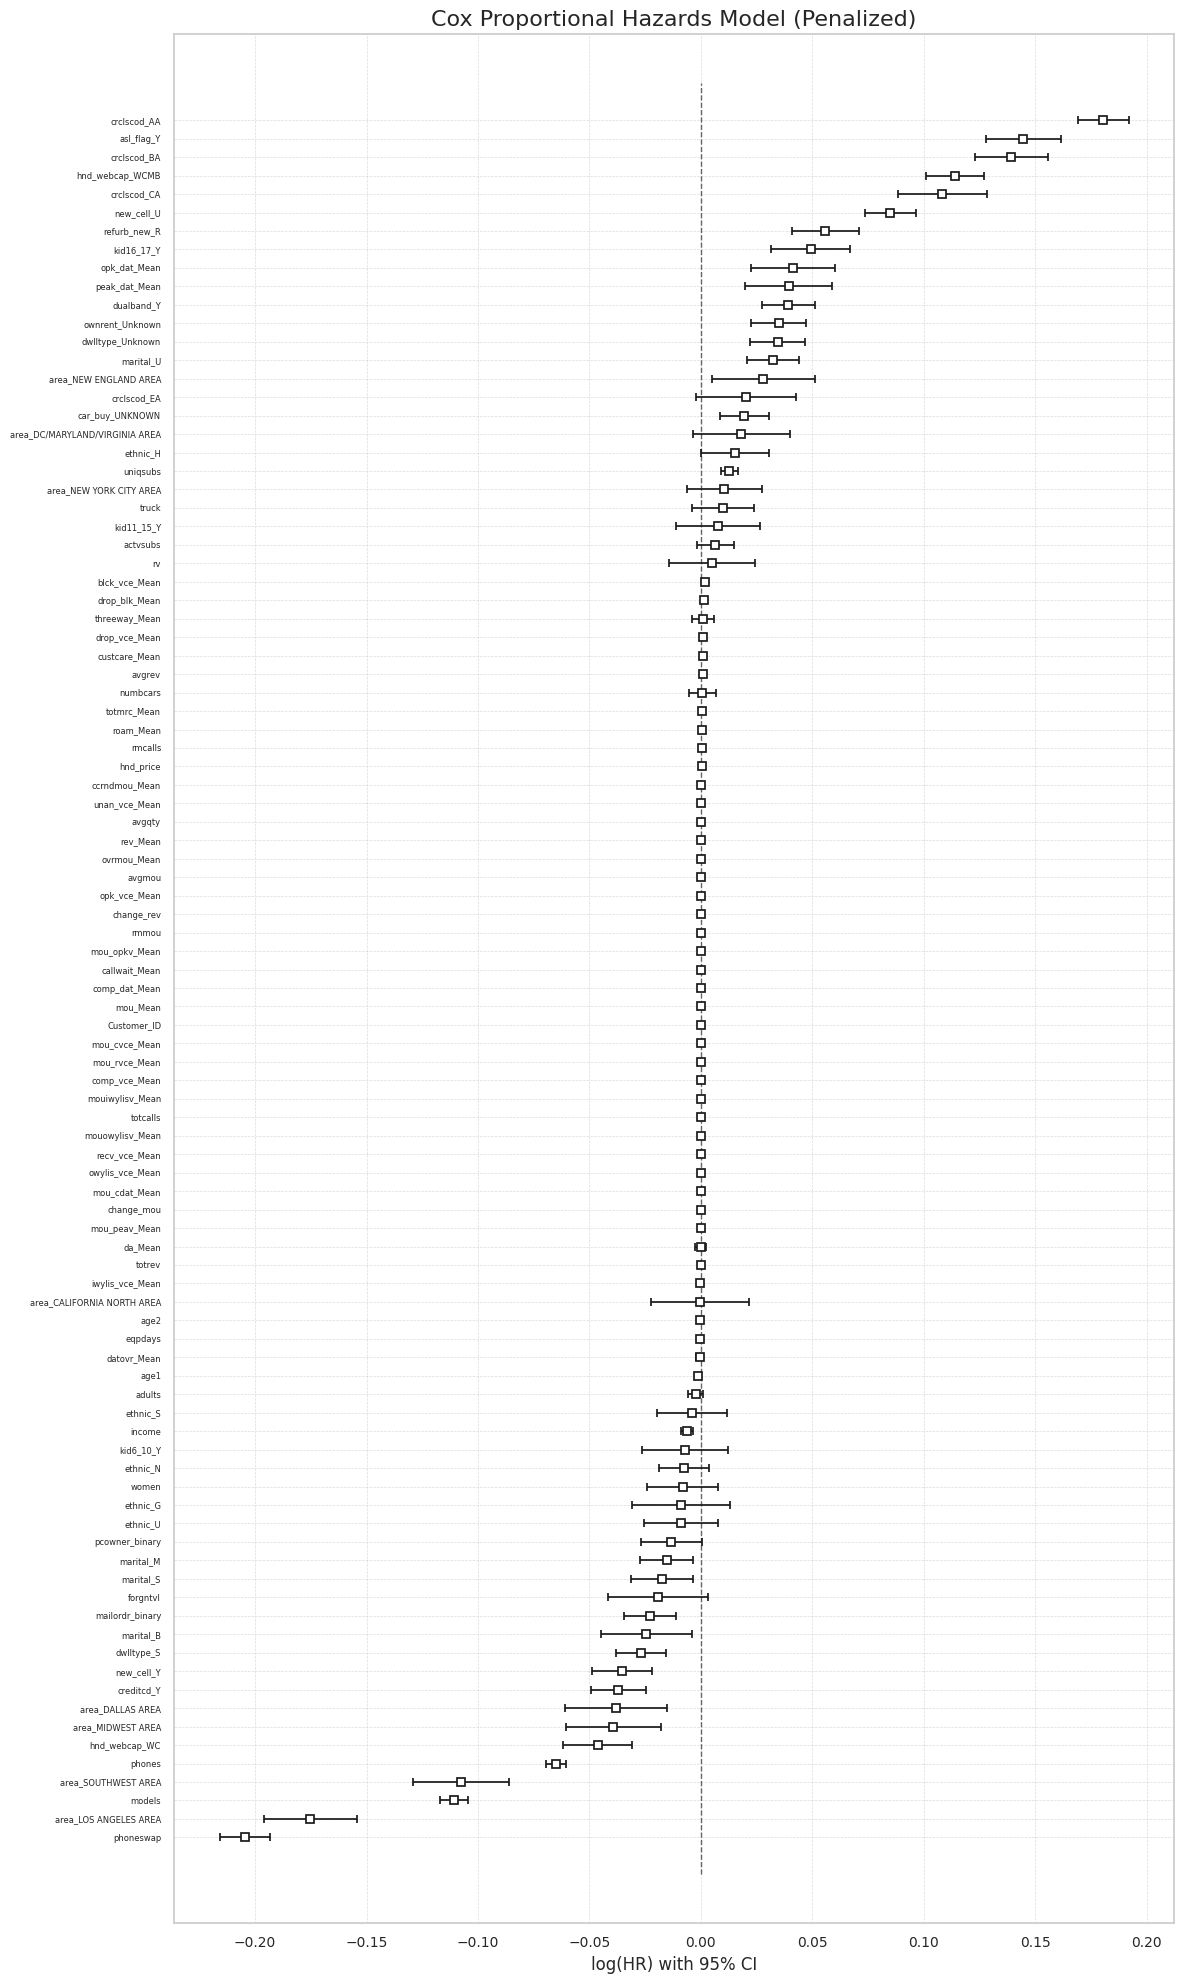

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by absolute value of coefficients
summary_df = cph.summary.sort_values('coef', ascending=False)

# Plot
plt.figure(figsize=(12, 20))  # Wider and taller
sns.set(style="whitegrid")

ax = plt.gca()
cph.plot(ax=ax)

# Adjust font and layout
plt.title('Cox Proportional Hazards Model (Penalized)', fontsize=16)
plt.xlabel('log(HR) with 95% CI', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=6)

plt.tight_layout()
plt.show()


<ipython-input-9-9e72acb2d5b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y=top_features.index, data=top_features, palette='coolwarm')


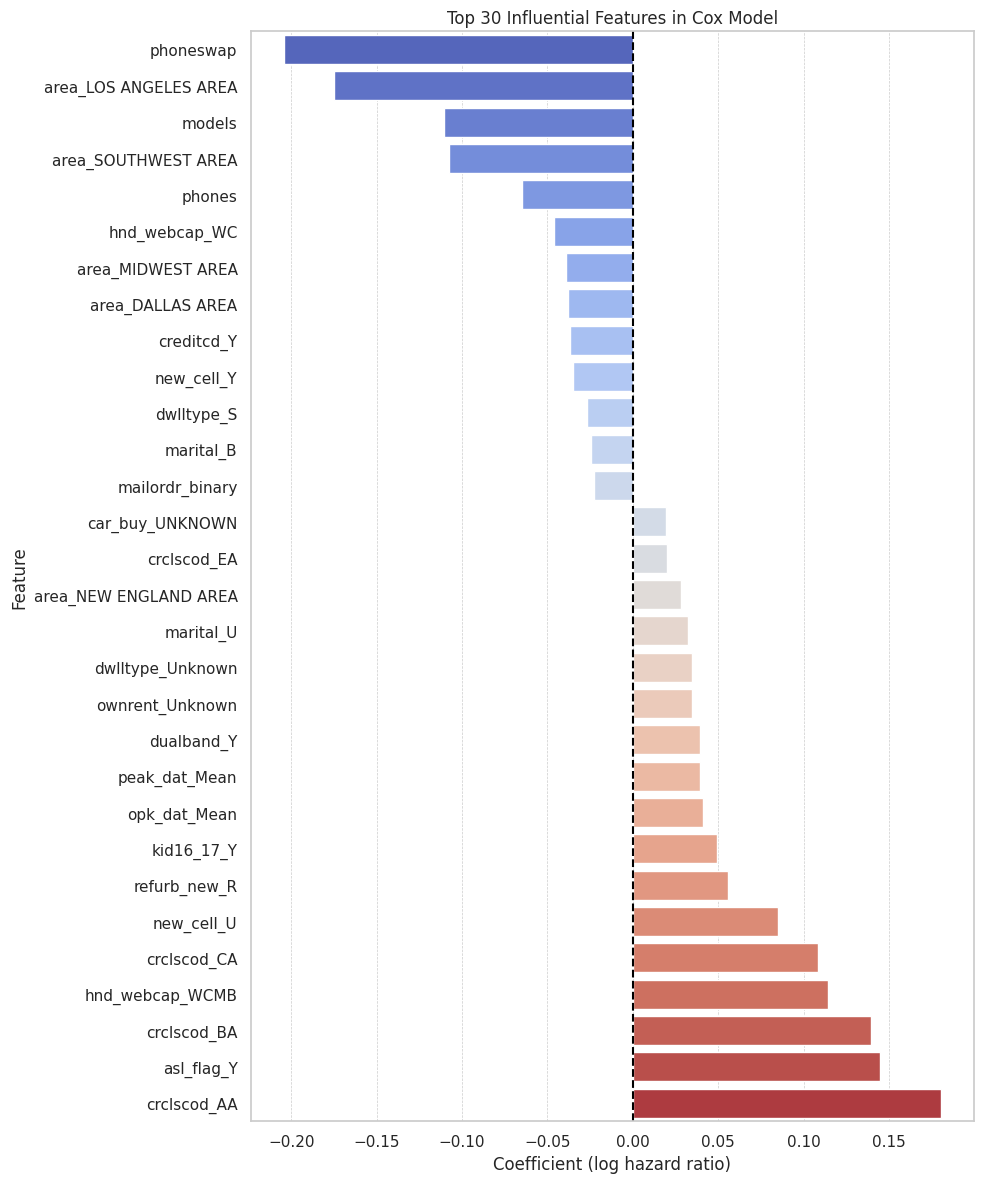

In [9]:
top_features = summary_df.iloc[np.argsort(summary_df['coef'].abs())[-30:]]  # top 30
top_features = top_features.sort_values('coef')

plt.figure(figsize=(10, 12))
sns.barplot(x='coef', y=top_features.index, data=top_features, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title('Top 30 Influential Features in Cox Model')
plt.xlabel('Coefficient (log hazard ratio)')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Initial Data Preview:
   rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25        22.50   0.2475          0.0          0.0   
1   16.9900     10.25        16.99   0.0000          0.0          0.0   
2   38.0000      7.50        38.00   0.0000          0.0          0.0   
3   55.2300    570.50        71.98   0.0000          0.0          0.0   
4   82.2750   1312.25        75.00   1.2375          0.0          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  Customer_ID   mail  \
0          0.0          0.0        0.0     -157.25  ...      1000001  False   
1          0.0          0.0        0.0       -4.25  ...      1000003  False   
2          0.0          0.0        0.0       -1.50  ...      1000004  False   
3          0.0          0.0        0.0       38.50  ...      1000005  False   
4          0.0          0.0        0.0      156.75  ...      1000006  False   

   phoneswap  retentioncall  acptcall  referrals  pcowner_binary

<ipython-input-10-ce038fbdae74>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cell1[col].fillna(cell1[col].median(), inplace=True)



Kaplan-Meier Model:


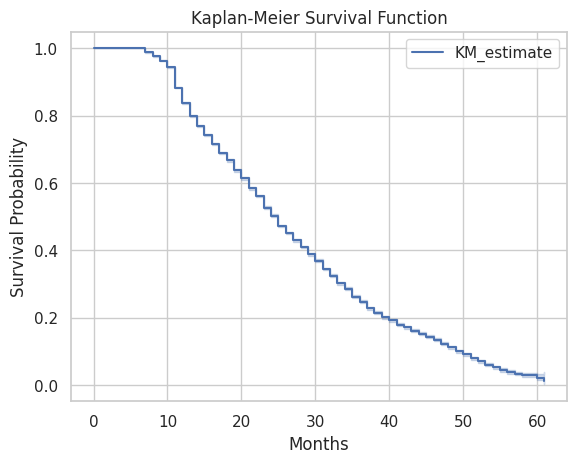

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter




# Display initial data
print("Initial Data Preview:")
print(cell1.head())

# Data cleaning
print("\nChecking for missing values:")
missing_values = cell1.isnull().sum()
print(missing_values[missing_values > 0])

# Dropping columns with excessive missing values or irrelevant columns
threshold = 0.5
cell1 = cell1[cell1.columns[cell1.isnull().mean() < threshold]]

# Filling remaining missing values with median for numerical columns
for col in cell1.select_dtypes(include=['float64', 'int64']).columns:
    cell1[col].fillna(cell1[col].median(), inplace=True)

# Convert categorical variables to numerical using one-hot encoding
categorical_columns = cell1.select_dtypes(include=['object']).columns
cell1_encoded = pd.get_dummies(cell1, columns=categorical_columns, drop_first=True)

# Kaplan-Meier Model
print("\nKaplan-Meier Model:")
kmf = KaplanMeierFitter()
kmf.fit(durations=cell1_encoded['months'], event_observed=cell1_encoded['churn'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Function')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.show()


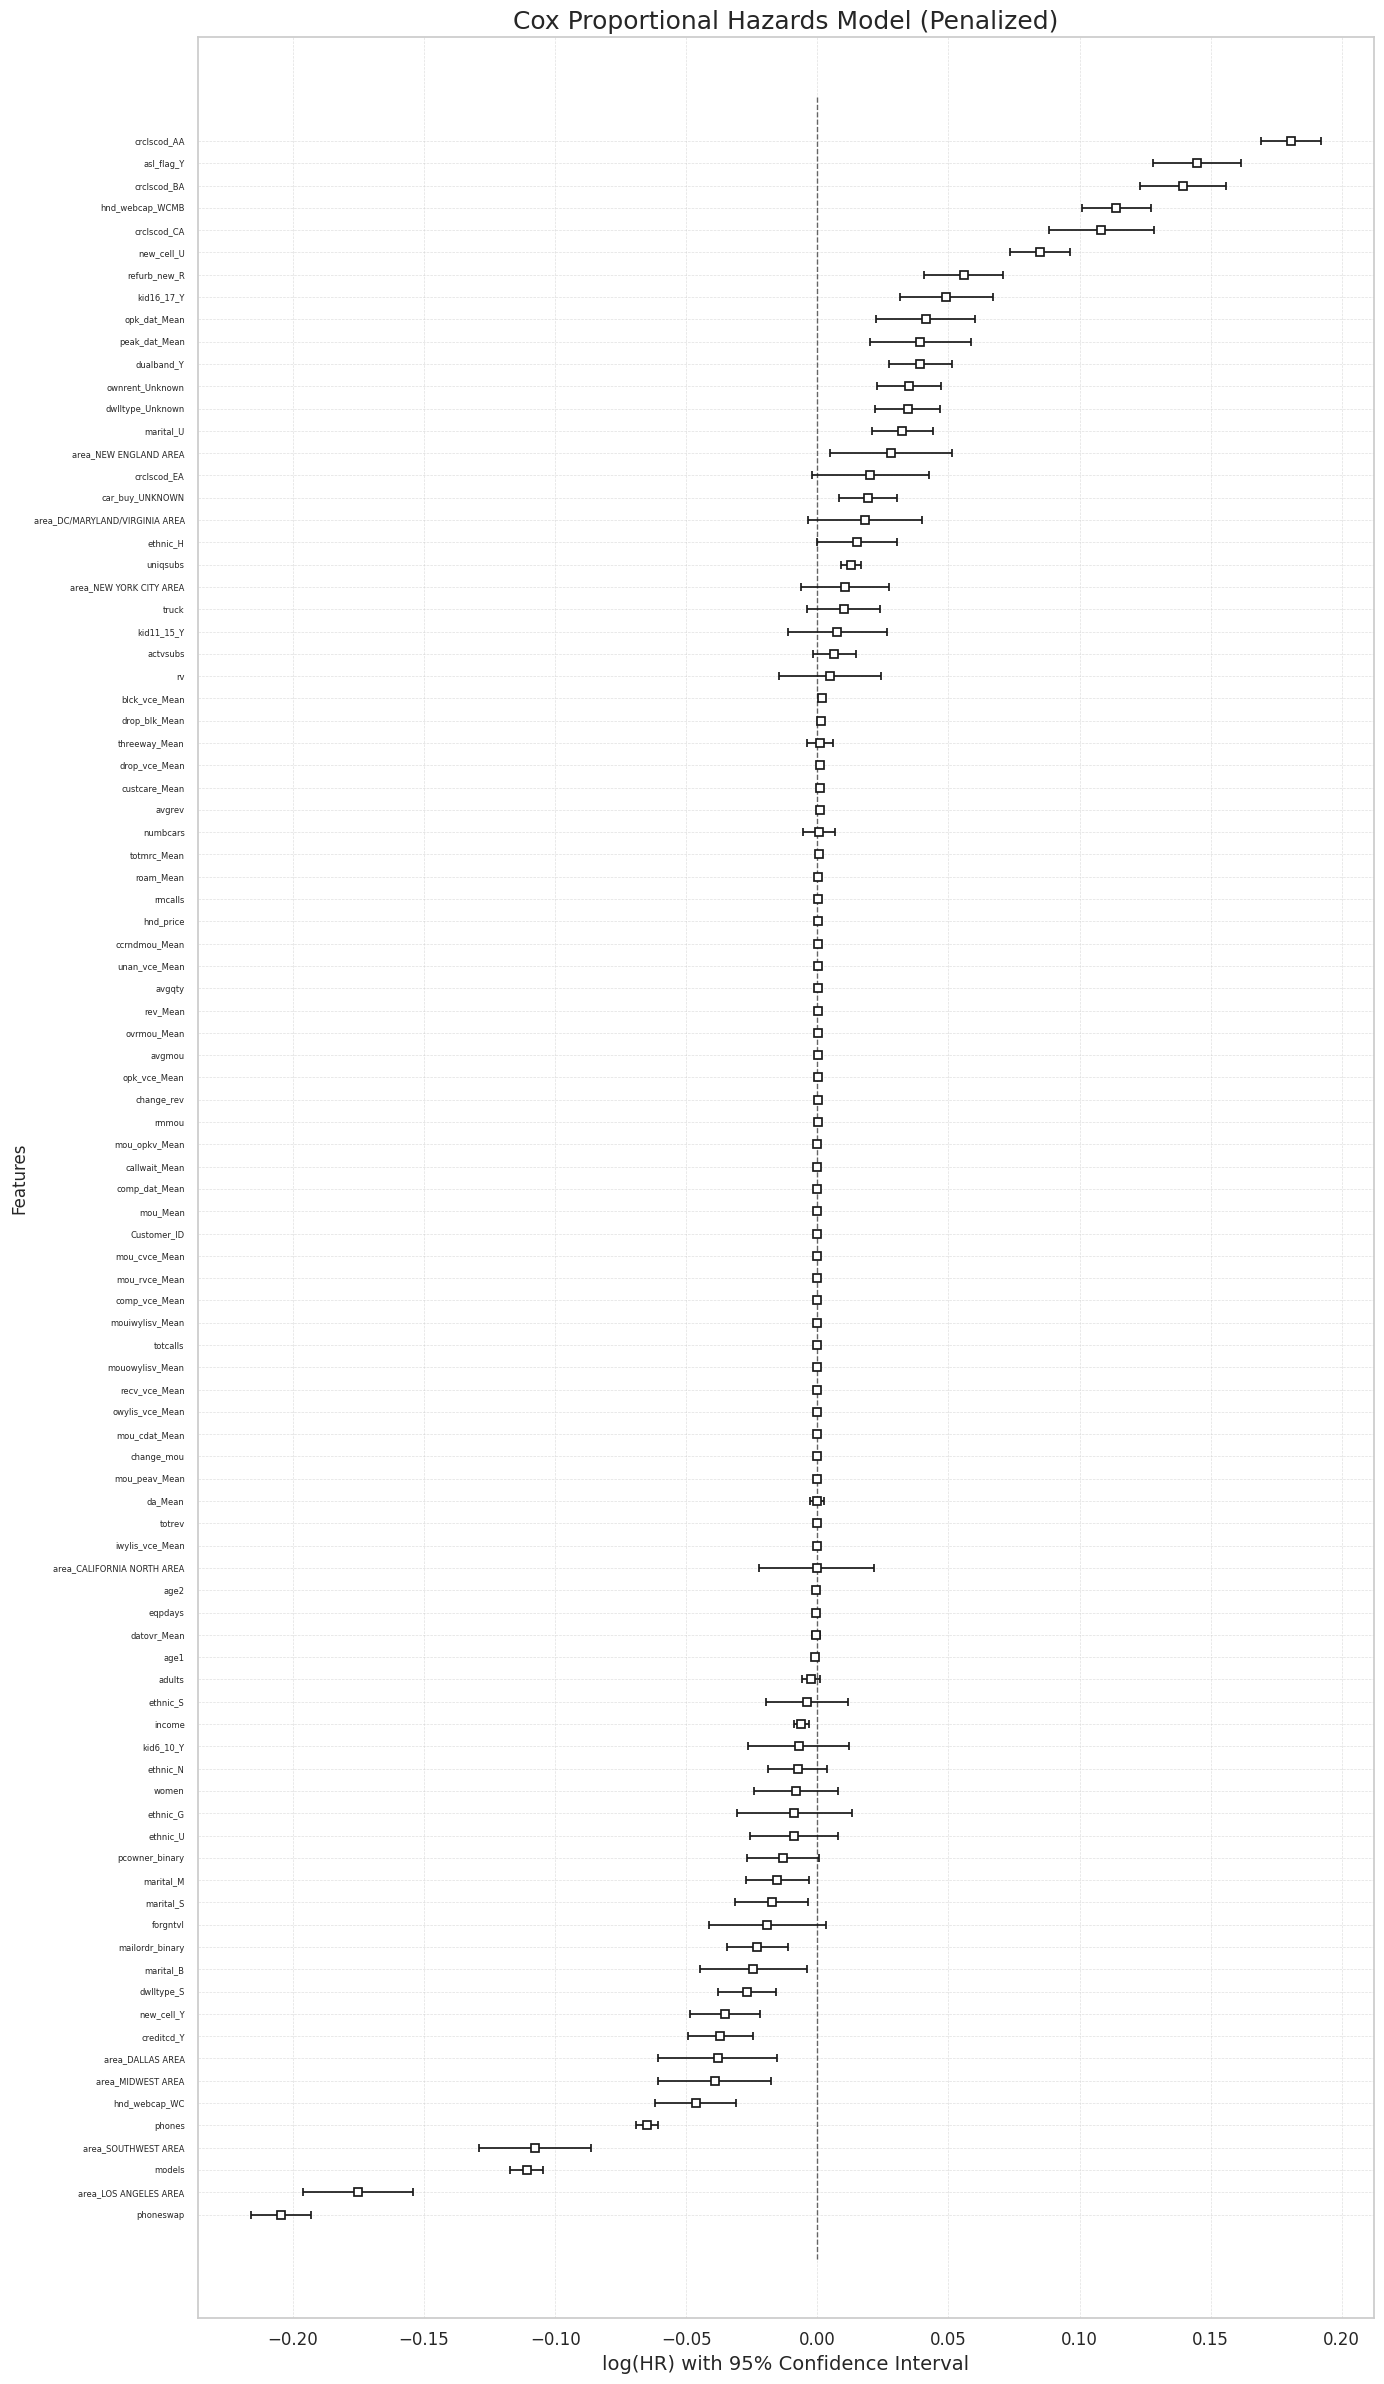

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn styling is used
sns.set(style="whitegrid")

# Sort summary by coefficient value
summary_df = cph.summary.sort_values('coef', ascending=False)

# Plot settings
plt.figure(figsize=(14, 24))  # Adjust figure size for many features
ax = plt.gca()

# Plot using lifelines' built-in method
cph.plot(ax=ax)

# Improve axis and labels
plt.title('Cox Proportional Hazards Model (Penalized)', fontsize=18)
plt.xlabel('log(HR) with 95% Confidence Interval', fontsize=14)
plt.ylabel('Features', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Font sizes for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=6)

# Layout tightening
plt.tight_layout()
plt.show()


<lifelines.CoxPHFitter: fitted with 93893 total observations, 47177 right-censored observations>
             duration col = 'months'
                event col = 'churn'
                penalizer = 1.0
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 93893
number of events observed = 46716
   partial log-likelihood = -477387.51
         time fit was run = 2025-05-24 18:00:17 UTC

---
                                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                           
rev_Mean                            0.00      1.00      0.00            0.00            0.00                1.00                1.00
mou_Mean                            0.00      1.00      0.00            0.00            0.00                1.00                1.00
totmrc_Mean                         0.00      1.00      0.00            0.00            0.00                1.00                1.00
da_Mean                             0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ovrmou_Mean                         0.00      1.00      0.00            0.00            0.00                1.00                1.00
datovr_Mean                        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
roam_Mean                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
change_mou                         -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
change_rev                          0.00      1.00      0.00            0.00            0.00                1.00                1.00
drop_vce_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
drop_dat_Mean                       0.02      1.02      0.02           -0.02            0.05                0.98                1.05
blck_vce_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
blck_dat_Mean                       0.04      1.04      0.03           -0.01            0.10                0.99                1.10
unan_vce_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
unan_dat_Mean                       0.04      1.04      0.02            0.01            0.07                1.01                1.07
recv_vce_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
comp_vce_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
comp_dat_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
custcare_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
ccrndmou_Mean                       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
threeway_Mean                       0.00      1.00      0.00           -0.00            0.01                1.00                1.01
mou_cvce_Mean                       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mou_cdat_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mou_rvce_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
owylis_vce_Mean                    -0.00      1.00      0.00           -0.00            0.00                

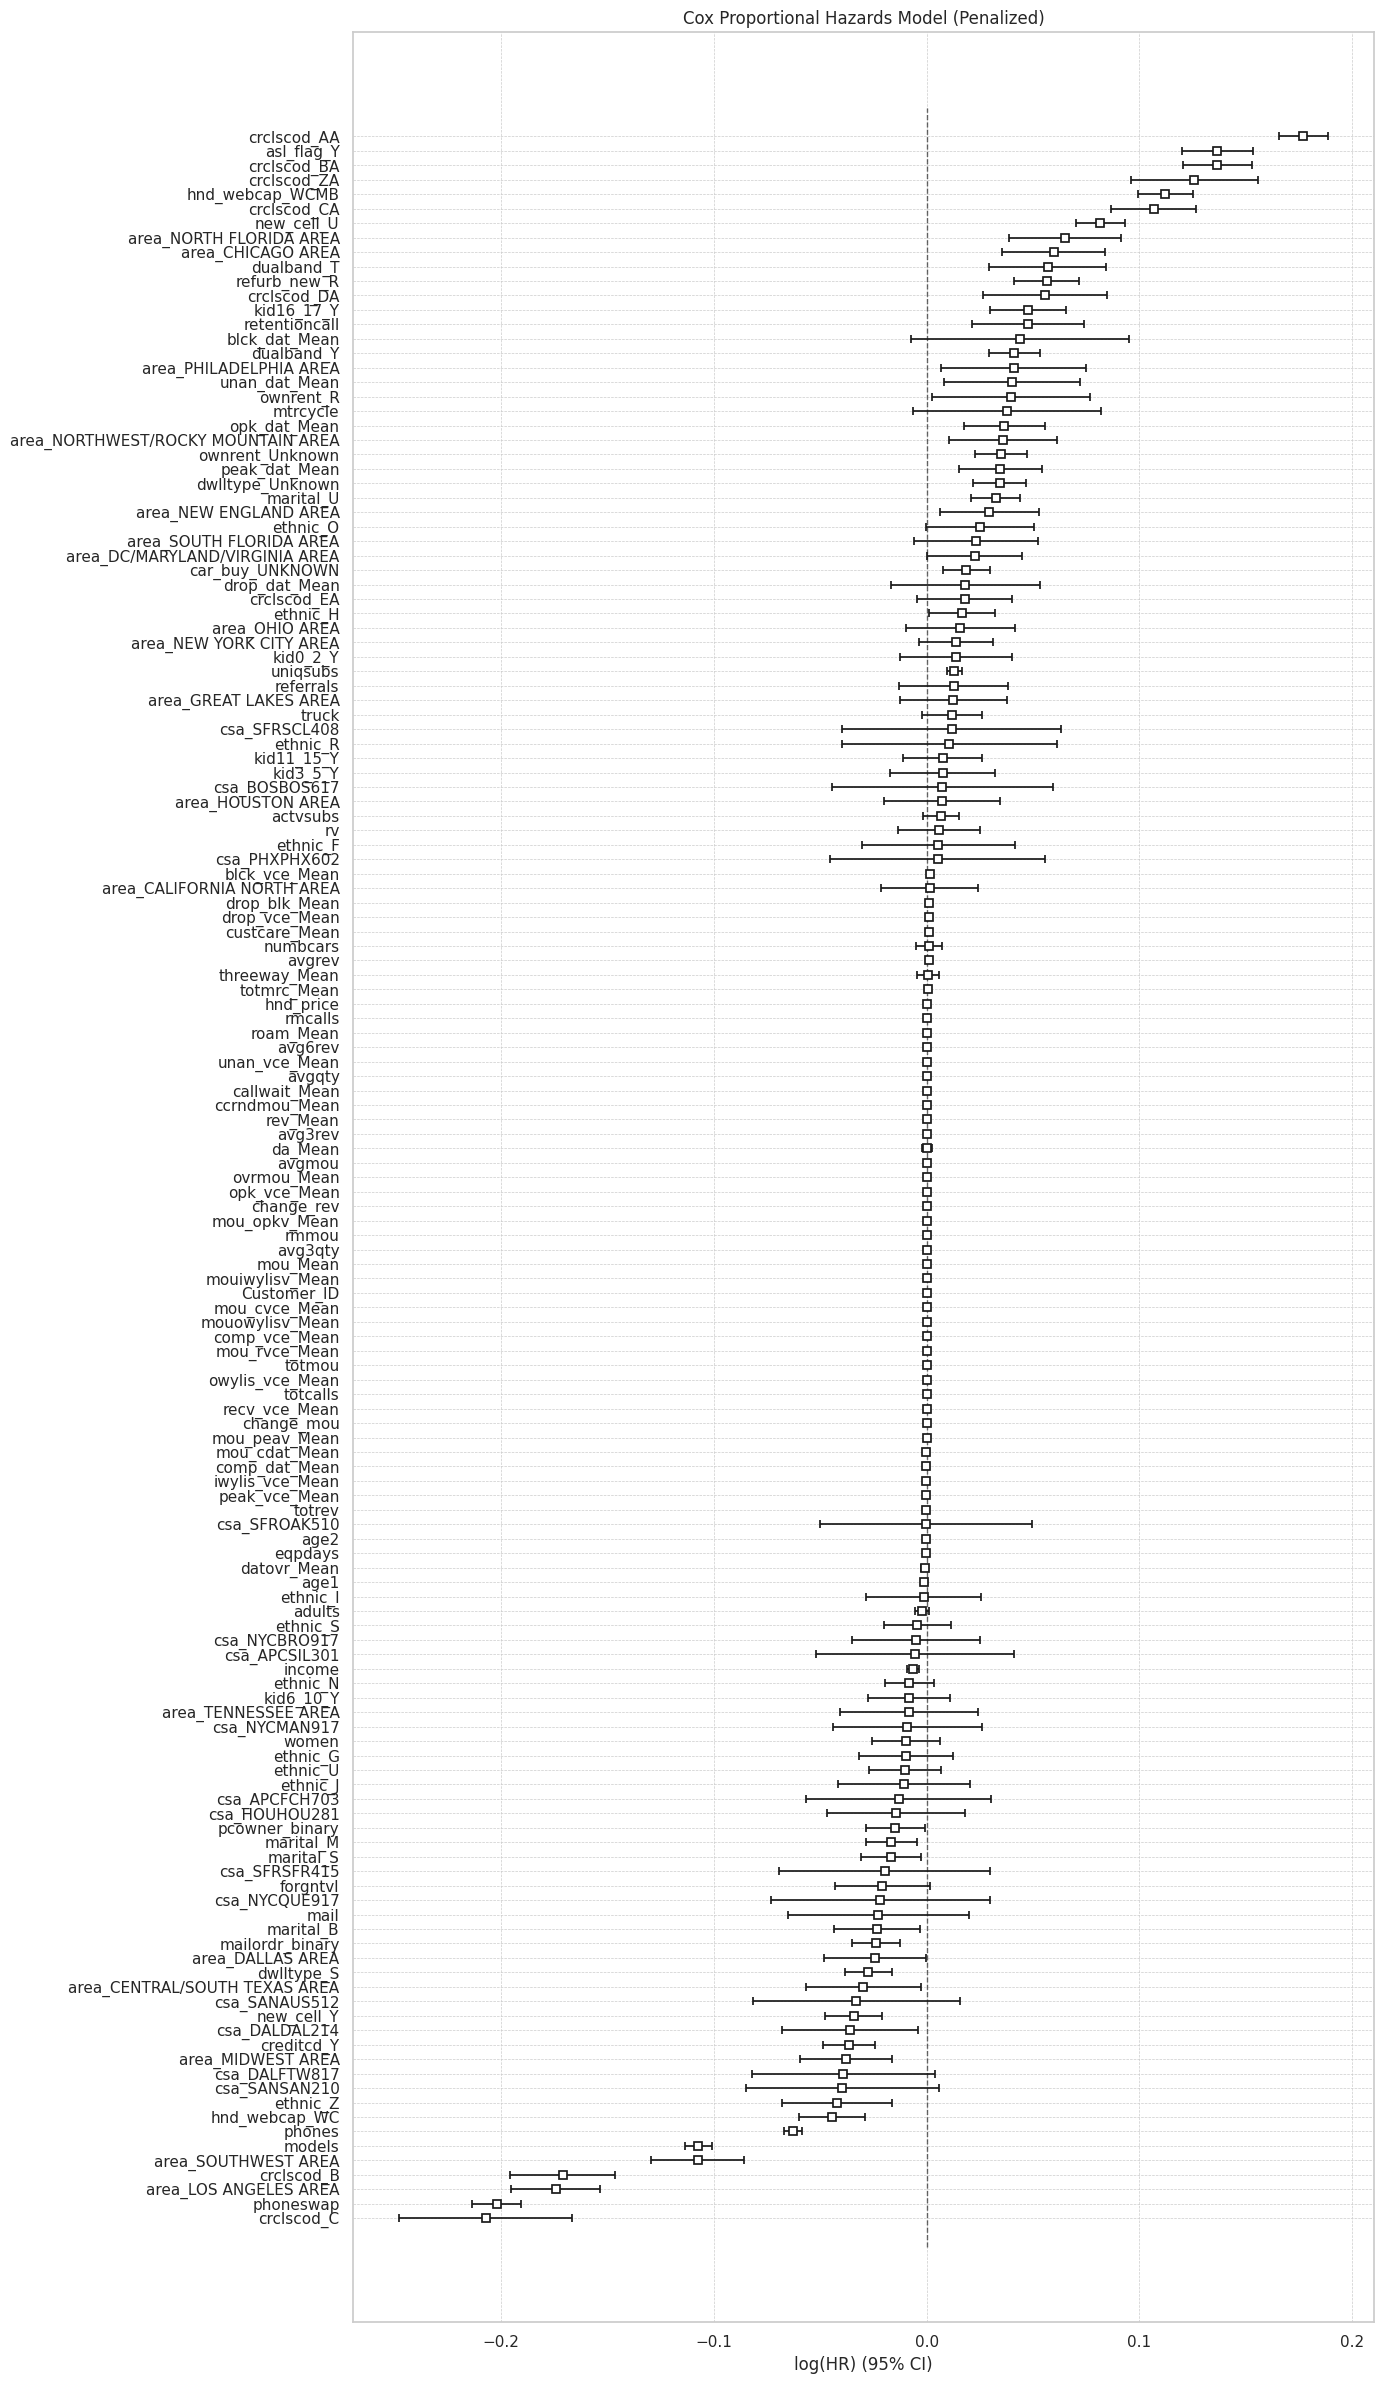

In [12]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import VarianceThreshold

# STEP 1: Drop near-zero variance columns
vt = VarianceThreshold(threshold=0.01)
X = vt.fit_transform(cell1_encoded)
selected_columns = cell1_encoded.columns[vt.get_support(indices=True)]
cell1_vt = pd.DataFrame(X, columns=selected_columns)

# STEP 2: Drop highly correlated columns
corr_matrix = cell1_vt.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cell1_filtered = cell1_vt.drop(columns=drop_cols)

# STEP 3: CoxPH model with L2 penalization
cph = CoxPHFitter(penalizer=1.0)
cph.fit(cell1_filtered, duration_col='months', event_col='churn')

# Summary & Plot
cph.print_summary()

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 24))
cph.plot()
plt.title('Cox Proportional Hazards Model (Penalized)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


<lifelines.CoxPHFitter: fitted with 93893 total observations, 47177 right-censored observations>
             duration col = 'months'
                event col = 'churn'
                penalizer = 1.0
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 93893
number of events observed = 46716
   partial log-likelihood = -478186.95
         time fit was run = 2025-05-24 18:00:51 UTC

---
                                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                           
rev_Mean                            0.00      1.00      0.00            0.00            0.00                1.00                1.00
mou_Mean                            0.00      1.00      0.00            0.00            0.00                1.00                1.00
totmrc_Mean                         0.00      1.00      0.00            0.00            0.00                1.00                1.00
da_Mean                             0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ovrmou_Mean                         0.00      1.00      0.00            0.00            0.00                1.00                1.00
datovr_Mean                        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
roam_Mean                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
change_mou                         -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
change_rev                          0.00      1.00      0.00            0.00            0.00                1.00                1.00
drop_vce_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
drop_dat_Mean                       0.02      1.02      0.02           -0.02            0.05                0.98                1.05
blck_vce_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
blck_dat_Mean                       0.04      1.04      0.03           -0.01            0.10                0.99                1.10
unan_vce_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
unan_dat_Mean                       0.04      1.04      0.02            0.01            0.07                1.01                1.07
recv_vce_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
comp_vce_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
comp_dat_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
custcare_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
ccrndmou_Mean                       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
threeway_Mean                       0.00      1.00      0.00           -0.00            0.01                1.00                1.01
mou_cvce_Mean                       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mou_cdat_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mou_rvce_Mean                      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
owylis_vce_Mean                    -0.00      1.00      0.00           -0.00            0.00                

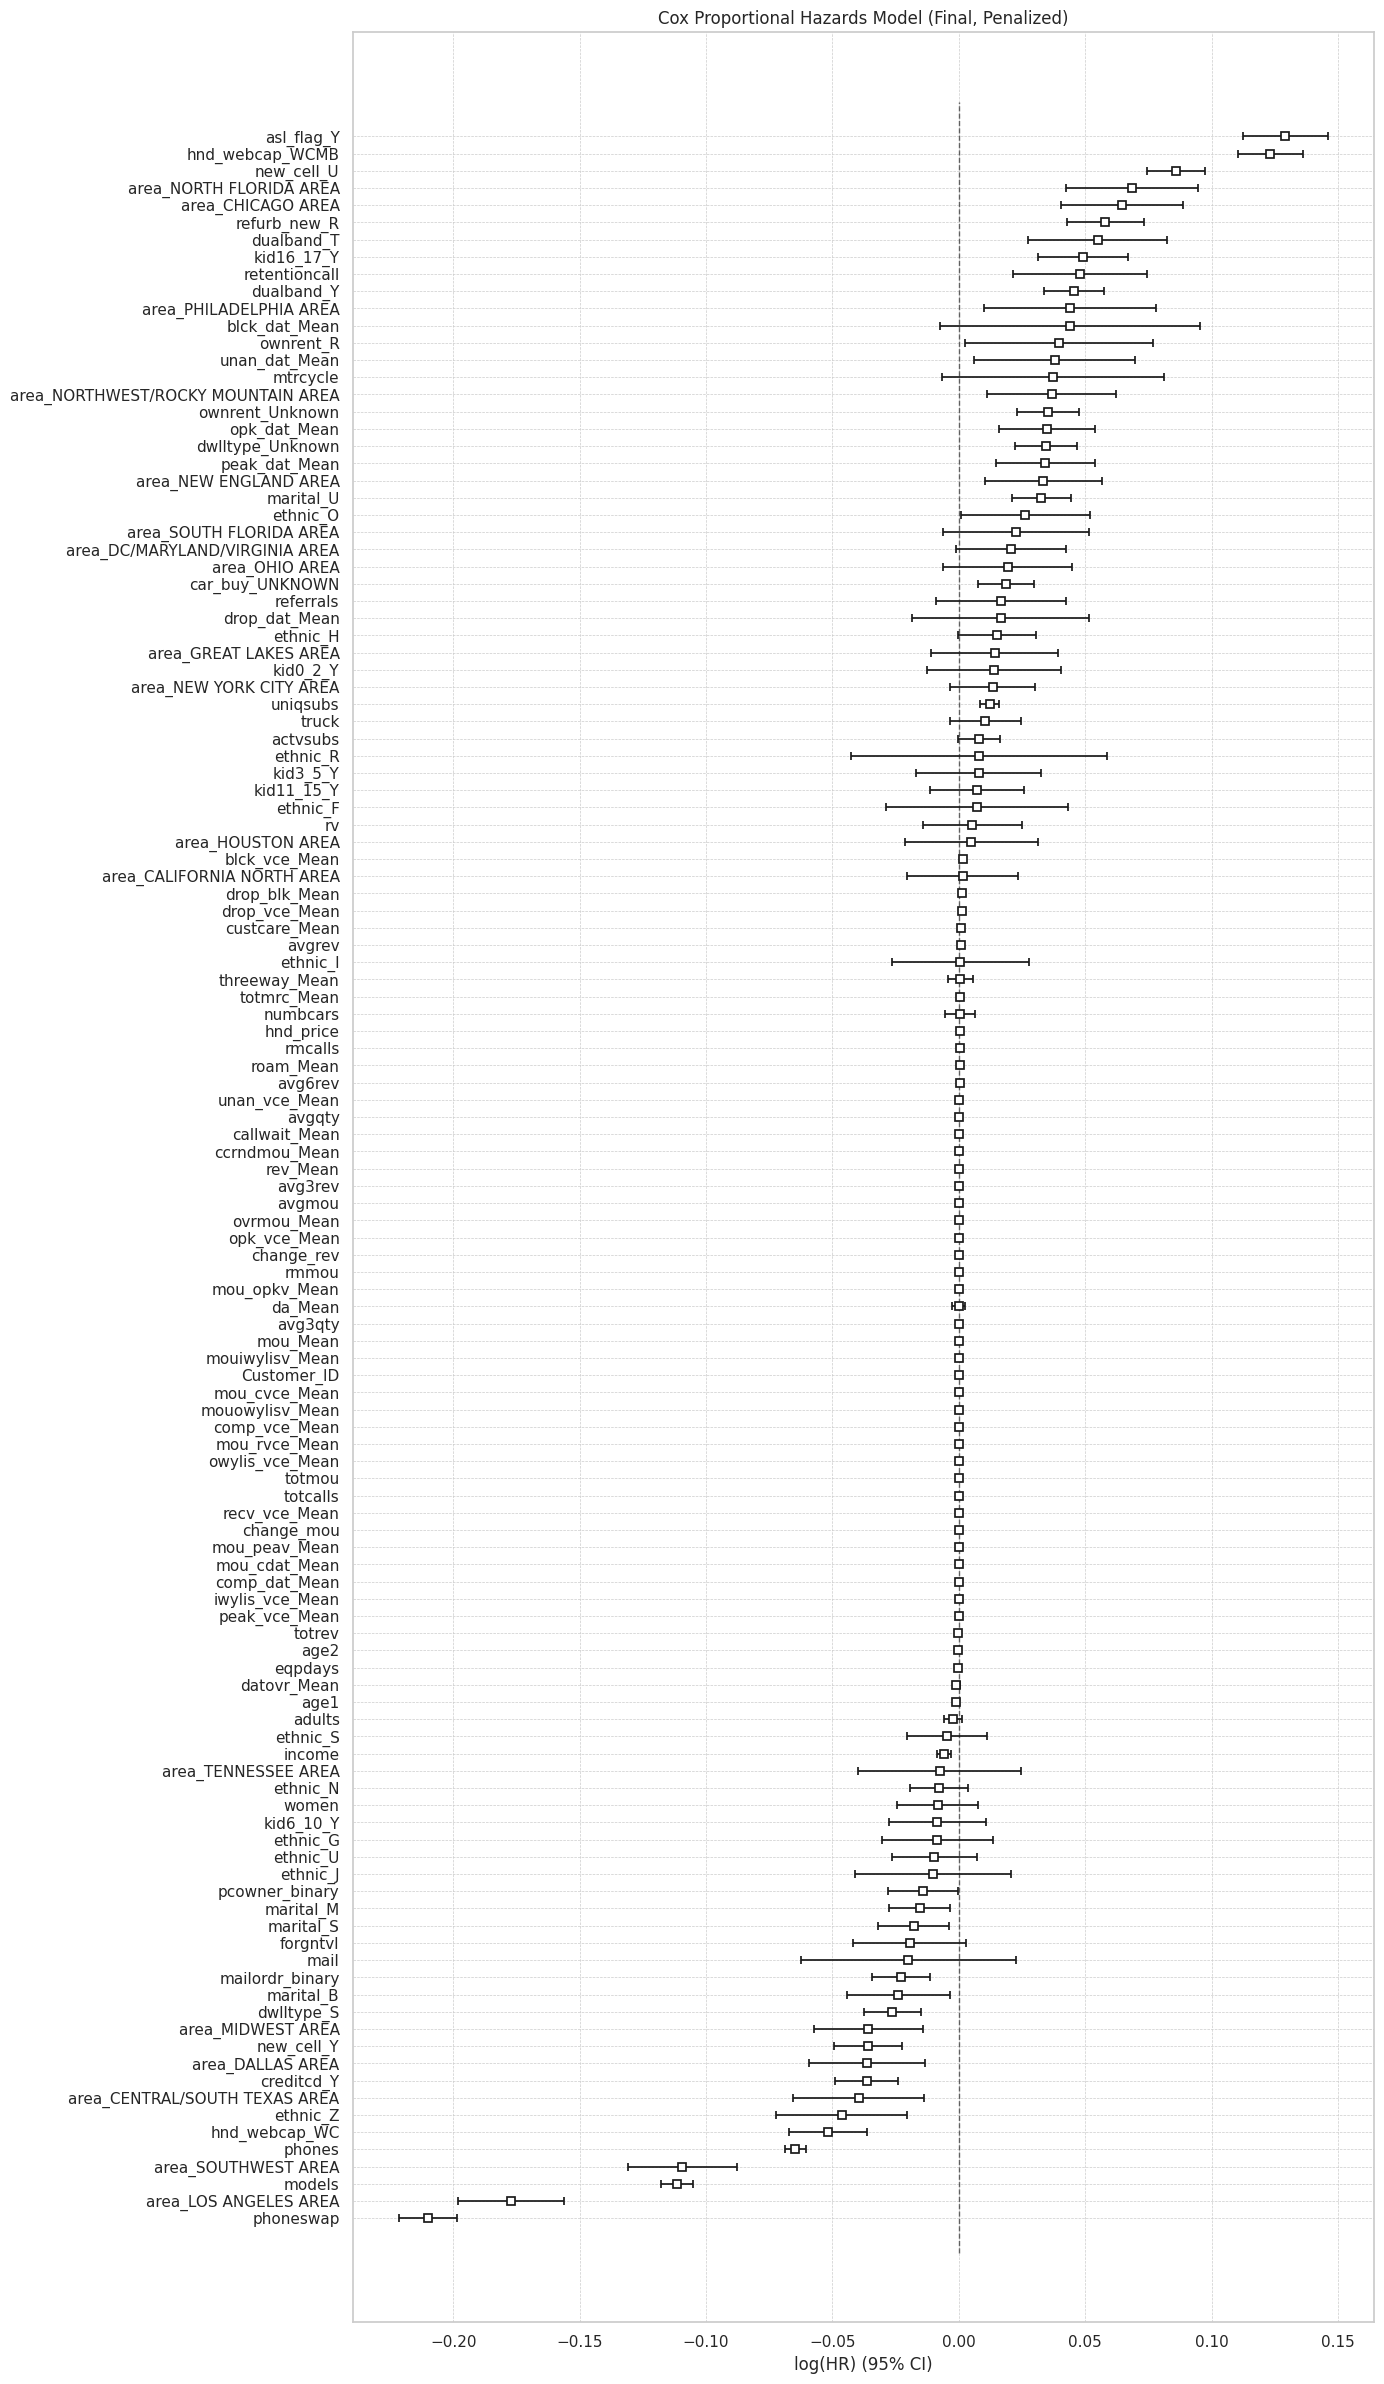

In [13]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Drop categorical features with too many unique values before encoding
drop_high_cardinality = [col for col in cell1.columns if cell1[col].dtype == 'object' and cell1[col].nunique() > 50]
cell1_reduced = cell1.drop(columns=drop_high_cardinality)

# Step 2: Fill missing numerics with median
for col in cell1_reduced.select_dtypes(include=['float64', 'int64']).columns:
    cell1_reduced[col] = cell1_reduced[col].fillna(cell1_reduced[col].median())

# Step 3: One-hot encode categorical variables
categorical_cols = cell1_reduced.select_dtypes(include='object').columns
cell1_encoded = pd.get_dummies(cell1_reduced, columns=categorical_cols, drop_first=True)

# Step 4: Drop near-zero variance columns
vt = VarianceThreshold(threshold=0.01)
X = vt.fit_transform(cell1_encoded)
selected_cols = cell1_encoded.columns[vt.get_support()]
cell1_vt = pd.DataFrame(X, columns=selected_cols)

# Step 5: Drop highly correlated features
corr_matrix = cell1_vt.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)]
cell1_final = cell1_vt.drop(columns=drop_cols)

# Step 6: Fit Cox Proportional Hazards Model
cph = CoxPHFitter(penalizer=1.0)
cph.fit(cell1_final, duration_col='months', event_col='churn')

# Step 7: Plot
cph.print_summary()
plt.figure(figsize=(14, 24))
cph.plot()
plt.title('Cox Proportional Hazards Model (Final, Penalized)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


<ipython-input-14-92ec01d3bea1>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cell1[col].fillna(cell1[col].median(), inplace=True)


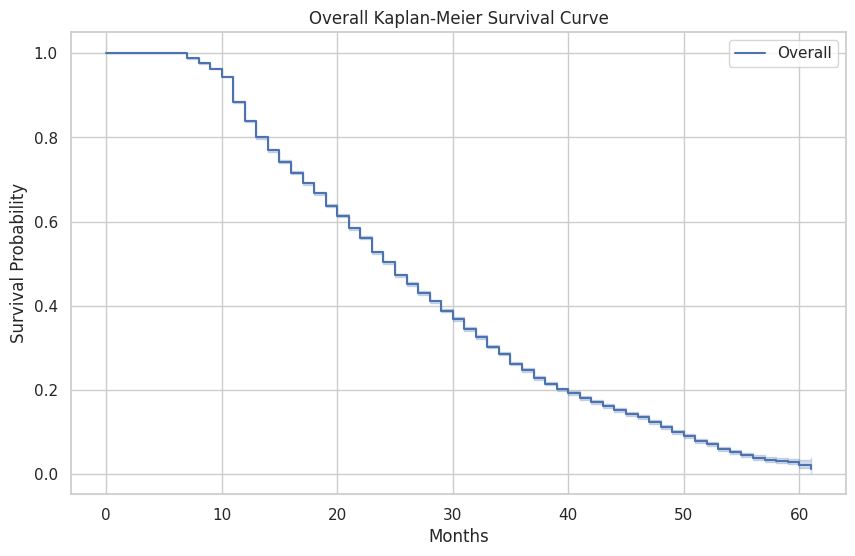

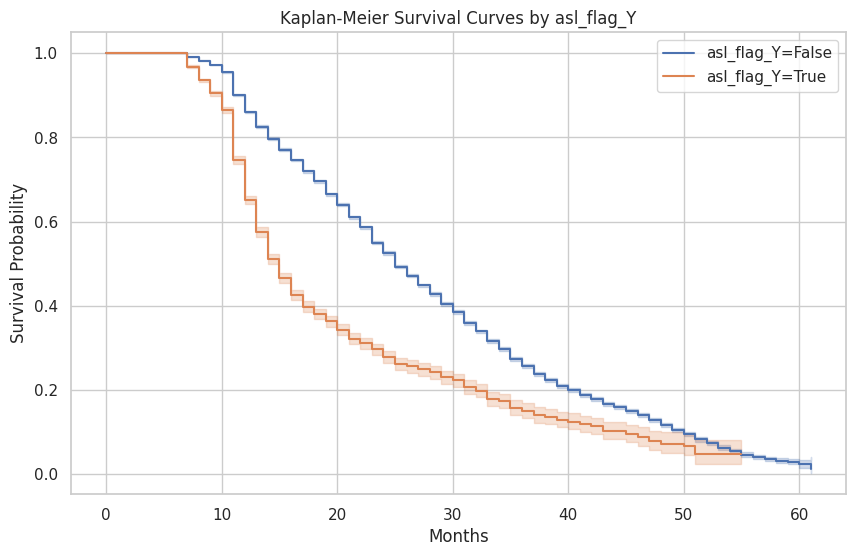

In [14]:


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from hmmlearn.hmm import MultinomialHMM


# Data Cleaning
# Drop columns with more than 50% missing data
cell1 = cell1.loc[:, cell1.isnull().mean() < 0.5]

# Fill missing numeric values with median
for col in cell1.select_dtypes(include=['float64', 'int64']).columns:
    cell1[col].fillna(cell1[col].median(), inplace=True)

# Encode categorical columns using one-hot encoding
categorical_columns = cell1.select_dtypes(include=['object']).columns
cell1_encoded = pd.get_dummies(cell1, columns=categorical_columns, drop_first=True)

# Ensure 'churn' and 'months' columns exist
assert 'churn' in cell1_encoded.columns and 'months' in cell1_encoded.columns

# Kaplan-Meier Estimator - Overall
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))
kmf.fit(durations=cell1_encoded['months'], event_observed=cell1_encoded['churn'], label='Overall')
kmf.plot_survival_function()
plt.title('Overall Kaplan-Meier Survival Curve')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.show()

# Kaplan-Meier Estimator - Stratified by 'asl_flag_Y' if available
if 'asl_flag_Y' in cell1_encoded.columns:
    plt.figure(figsize=(10, 6))
    for group_label, group_df in cell1_encoded.groupby('asl_flag_Y'):
        kmf.fit(durations=group_df['months'], event_observed=group_df['churn'], label=f'asl_flag_Y={group_label}')
        kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curves by asl_flag_Y')
    plt.xlabel('Months')
    plt.ylabel('Survival Probability')
    plt.show()

